In [1]:
import random
import matplotlib.pyplot as plt
random.seed(42)
# --- Bandit ---
class BinaryBandit(object):
  p = [0]*2
  def __init__(self):
    # N = number of arms
    self.N = 2
    for i in range(0,self.N):
      self.p[i] = random.random()
  def actions(self):
    result = []
    for i in range(0,self.N):
      result.append(i)
    return result
  def reward(self, action):
    rand = random.random()
    if rand < self.p[action]:
      return 1
    else:
      return 0

In [2]:
from menace import MENACE, check_winner, random_opponent_move

In [3]:
import matplotlib.pyplot as plt
import random

def play_game(menace):
    board = ["-"] * 9
    history = []
    turn = random.choice(["X", "O"])  # X = MENACE, O = opponent

    while True:
        if turn == "X":
            move = menace.choose_move(board)
            state_key = ''.join(board)
            history.append((state_key, move))
            board[move] = "X"
        else:
            move = random_opponent_move(board)
            board[move] = "O"

        winner = check_winner(board)
        if winner is not None:
            if winner == "X":
                menace.record_history(history)
                menace.update("win")
                return "win"
            elif winner == "O":
                menace.record_history(history)
                menace.update("loss")
                return "loss"
            else:
                menace.record_history(history)
                menace.update("draw")
                return "draw"

        turn = "O" if turn == "X" else "X"


In [4]:
menace = MENACE()
episodes = 5000

wins = 0
draws = 0
losses = 0
win_rate = []

for i in range(episodes):
    result = play_game(menace)
    if result == "win":
        wins += 1
    elif result == "loss":
        losses += 1
    else:
        draws += 1

    if (i+1) % 50 == 0:
        win_rate.append(wins / (i+1))


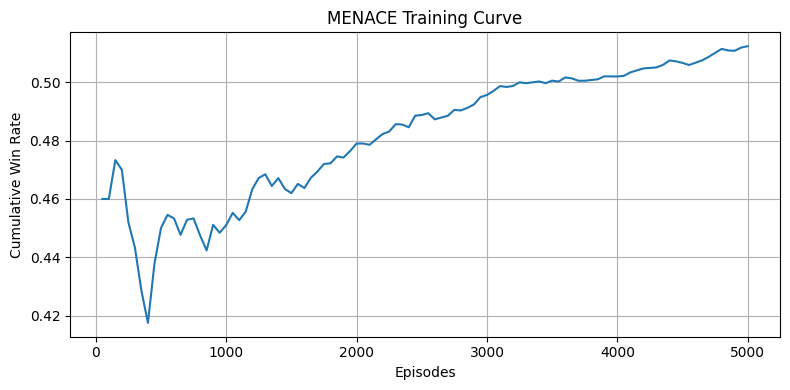

In [5]:
plt.figure(figsize=(8,4))
plt.plot(range(50, episodes+1, 50), win_rate)
plt.title("MENACE Training Curve")
plt.xlabel("Episodes")
plt.ylabel("Cumulative Win Rate")
plt.grid(True)
plt.tight_layout()
plt.savefig("menace_results.png", dpi=200)
plt.show()


In [6]:
def eGreedy_binary(myBandit, epsilon, max_iteration):
  # Initialization
  Q = [0]*myBandit.N
  count = [0]*myBandit.N
  r = 0
  R = []
  R_avg = [0]*1
  # Incremental Implementation
  for iter in range(1,max_iteration+1):
    if random.random() > epsilon:
      action = Q.index(max(Q)) # Exploit/ Greed
    else:
      action = random.choice(myBandit.actions()) # Explore
    r = myBandit.reward(action)
    R.append(r)
    count[action] = count[action]+1
    Q[action] = Q[action]+(r - Q[action])/count[action]
    R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
    if iter == max_iteration:
      print("Final Counts for move 1:", count[0])
      print("Final Counts for move 2:", count[1])

      actionTaken = ["1", "2"]
      # Create bar plot
      plt.bar(actionTaken, count)

      # Set plot title and axis labels
      plt.title("Number of times each action taken")
      plt.xlabel("Action")
      plt.ylabel("Count")

      # Show plot
      plt.show()

  return Q, R_avg, R

Final Counts for move 1: 4736
Final Counts for move 2: 264


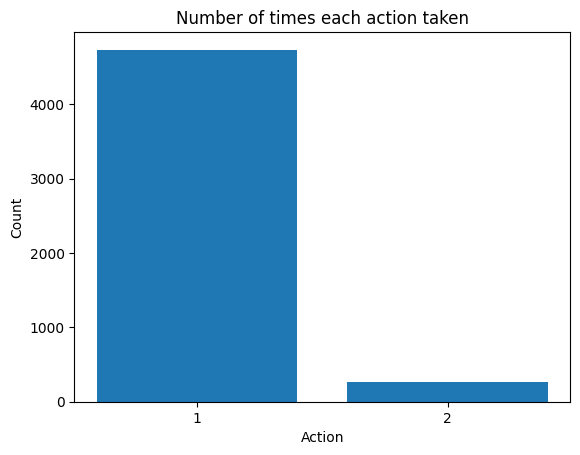

******************        RESULTS FOR BANDIT A         *************************
Observed Average Reward over 2000 experiments for action 1: 0.5758023648648655
Observed Average Reward over 2000 experiments for action 2: 0.4090909090909091
----------------------------------------------------------------------------------
Actual Reward for action 1: 0.5714025946899135
Actual Reward for action 2: 0.4288890546751146
**********************************************************************************


In [7]:
random.seed(10)
myBanditA = BinaryBandit()
Q, R_avg, R = eGreedy_binary(myBanditA, 0.1, 5000)
print("******************        RESULTS FOR BANDIT A         *************************")

print("Observed Average Reward over 2000 experiments for action 1:", Q[0])
print("Observed Average Reward over 2000 experiments for action 2:", Q[1])
print("----------------------------------------------------------------------------------")
print("Actual Reward for action 1:",myBanditA.p[0])
print("Actual Reward for action 2:",myBanditA.p[1])

print("**********************************************************************************")

Text(0, 0.5, 'Reward')

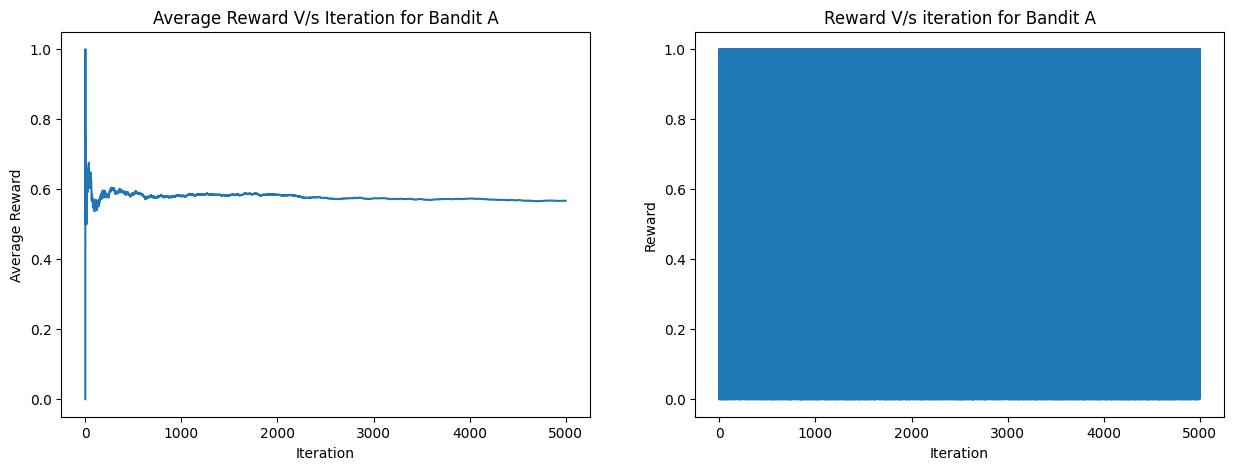

In [8]:
# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(R_avg)
ax1.title.set_text("Average Reward V/s Iteration for Bandit A")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Average Reward")
ax2.plot(R)
ax2.title.set_text("Reward V/s iteration for Bandit A")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Reward")


Final Counts for move 1: 4736
Final Counts for move 2: 264


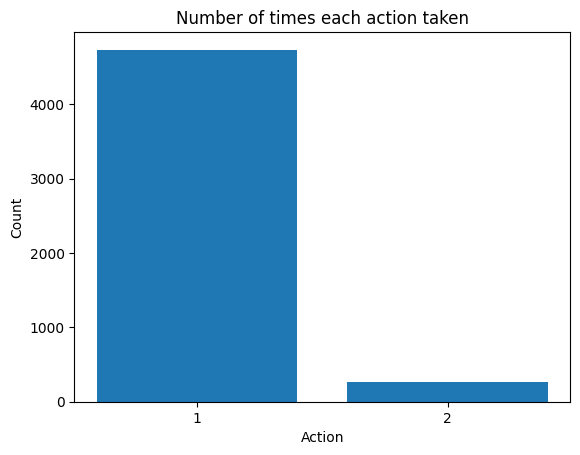

************************        RESULTS FOR BANDIT B         ******************************
Observed Average Reward over 2000 experiments for action 1: 0.5758023648648655
Observed Average Reward over 2000 experiments for action 2: 0.4090909090909091
---------------------------------------------------------------------------------------------
Actual Reward for action 1: 0.5714025946899135
Actual Reward for action 2: 0.4288890546751146
**********************************************************************************************


In [9]:
random.seed(10)
myBanditB = BinaryBandit()
Q, R_avg, R = eGreedy_binary(myBanditB, 0.1, 5000)
print("************************        RESULTS FOR BANDIT B         ******************************")

print("Observed Average Reward over 2000 experiments for action 1:", Q[0])
print("Observed Average Reward over 2000 experiments for action 2:", Q[1])
print("---------------------------------------------------------------------------------------------")
print("Actual Reward for action 1:",myBanditB.p[0])
print("Actual Reward for action 2:",myBanditB.p[1])

print("**********************************************************************************************")

Text(0, 0.5, 'Reward')

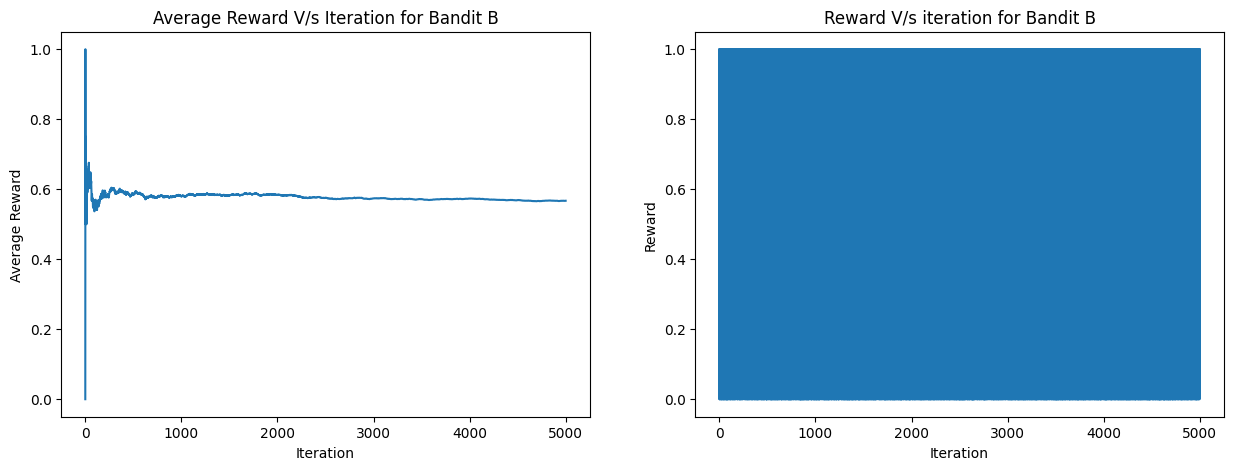

In [10]:
# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(R_avg)
ax1.title.set_text("Average Reward V/s Iteration for Bandit B")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Average Reward")
ax2.plot(R)
ax2.title.set_text("Reward V/s iteration for Bandit B")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Reward")

In [11]:
import random
# --- Bandit ---
class Bandit(object):
  def __init__(self, N):
    # N = number of arms
    self.N = N
    expRewards = [10]*N
    self.expRewards = expRewards
  def actions(self):
    result = list(range(0,self.N))
    return result
  def reward(self, action):
    result = []

    for i in range(len(self.expRewards)):
      self.expRewards[i]+=random.gauss(0,0.1)# Rewards with random Gaussian / original non stationary change

    result = self.expRewards[action]+random.gauss(0,0.01)
    return result

In [12]:
def eGreedy(myBandit, epsilon, max_iteration):
  # Initialization
  Q = [0]*myBandit.N # Average Reward of actions which will be learned over iterations
  count = [0]*myBandit.N #To maintain the number of times action is done
  epsilon = epsilon
  r = 0
  R = []
  R_avg = [0]*1
  max_iter = max_iteration
  # Incremental Implementation
  for iter in range(1,max_iter):
    if random.random() > epsilon:
      action = Q.index(max(Q)) # Exploit/ Greed
    else:
      action = random.choice(myBandit.actions()) # Explore
    r = myBandit.reward(action)
    R.append(r)
    count[action] = count[action]+1
    Q[action] = Q[action]+(r - Q[action])/count[action] #Averaging as per history
    R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)

  return Q, R_avg, R

In [13]:
random.seed(10)
myBandit = Bandit(10)
Q, R_avg, R = eGreedy(myBandit, 0.3, 10000)

In [14]:
print("Actual\tRecovered ")
sum = 0
for i,j in zip(myBandit.expRewards, Q):
    print(f"{i:.3f} \t {j:.3f}")
    sum += (i-j)**2
print('total squared error = ',sum)

Actual	Recovered 
2.278 	 5.537
4.969 	 6.005
22.026 	 13.749
16.328 	 13.448
5.842 	 8.532
4.634 	 5.632
4.155 	 6.647
21.718 	 19.298
11.796 	 5.098
-1.138 	 7.694
total squared error =  231.67337106514094


Text(0.5, 0.98, 'Unmodified Epsilon Greedy Policy')

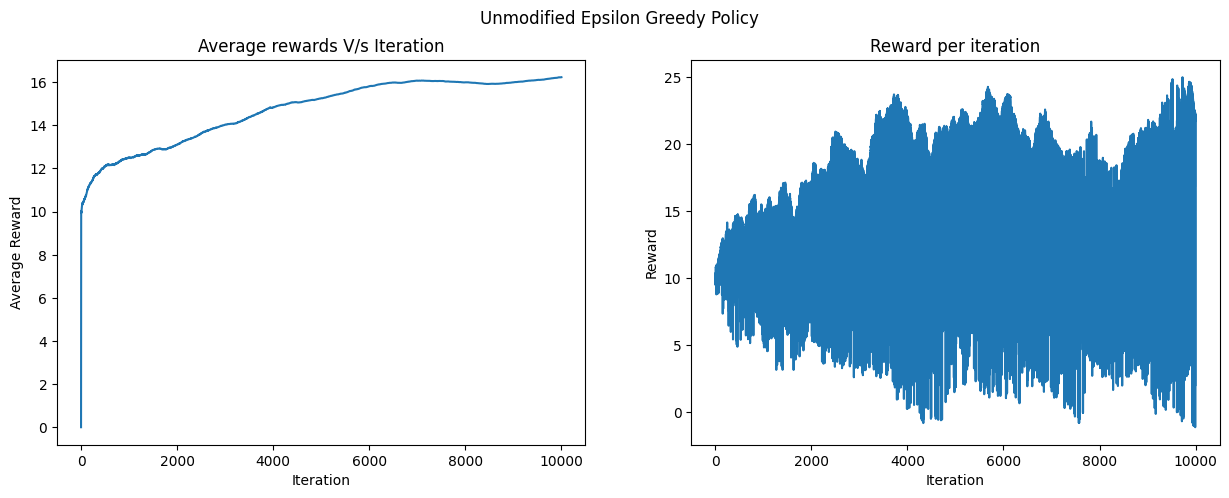

In [15]:
import matplotlib.pyplot as plt
# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(R_avg)
ax1.title.set_text("Average rewards V/s Iteration")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Average Reward")
ax2.plot(R)
ax2.title.set_text("Reward per iteration")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Reward")
fig.suptitle("Unmodified Epsilon Greedy Policy")

In [16]:
def eGreedy_modified(myBandit, epsilon, max_iteration, alpha):
  # Initialization
  Q = [0]*myBandit.N
  count = [0]*myBandit.N
  epsilon = epsilon
  r = 0
  R = []
  R_avg = [0]*1
  max_iter = max_iteration
  # Incremental Implementation
  for iter in range(1,max_iter):
    if random.random() > epsilon:
      action = Q.index(max(Q)) # Exploit/ Greed
    else:
      action = random.choice(myBandit.actions()) # Explore
    r = myBandit.reward(action)
    R.append(r)
    count[action] = count[action]+1
    Q[action] = Q[action]+ alpha*(r - Q[action])
    R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)

  return Q, R_avg, R

In [17]:
random.seed(10)
myBandit = Bandit(N=10)
Q, R_avg, R = eGreedy_modified(myBandit, 0.4, 10000, 0.1)

In [18]:
print("Actual\tRecovered ")
sum = 0
for i,j in zip(myBandit.expRewards, Q):
    print(f"{i:.3f} \t {j:.3f}")
    sum += (i-j)**2
print('total squared error = ',sum)

Actual	Recovered 
13.304 	 14.895
13.071 	 13.126
2.650 	 0.310
3.259 	 5.674
25.276 	 25.705
19.278 	 17.701
4.403 	 5.310
9.309 	 10.945
17.068 	 15.720
-0.906 	 -1.310
total squared error =  21.995951789790993


Text(0.5, 0.98, 'Modified Epsilon Greedy Policy')

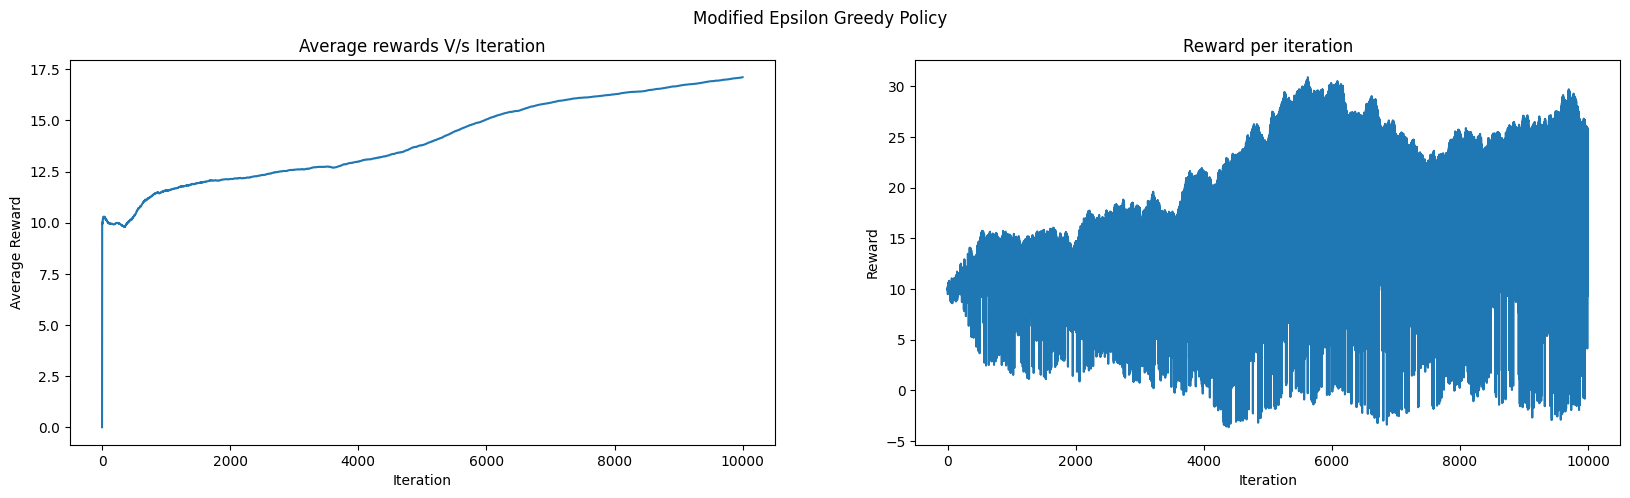

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.plot(R_avg)
# ax1.set_yticks(np.arange(0,20))
ax1.title.set_text("Average rewards V/s Iteration")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Average Reward")
ax2.plot(R)
ax2.title.set_text("Reward per iteration")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Reward")
fig.suptitle("Modified Epsilon Greedy Policy")